# Ansätze der Ausgangslösungen

In [1]:
V = 500e-3

c_ges = 0.03
c1_naoh = 0.5
print(f"Es werden {c_ges*V/c1_naoh *1e3} mL NaOH auf 500 mL verdünnt")

M_EE = 4 * 12.011 + 2* 15.999 + 8 * 1.008
dichte_EE = 0.902e3
print(f"Es werden {c_ges*V*M_EE/dichte_EE*1e3} mL EE auf 500 mL verdünnt") 


Es werden 30.0 mL NaOH auf 500 mL verdünnt
Es werden 1.4651773835920174 mL EE auf 500 mL verdünnt


# Titration der Natronlauge 

In [2]:
V_HCl = 15.0


V_NaOH = 50
c_HCl = 0.1 
print(f"Erwarteter Verbrauch an Maßlösung:{(V_NaOH * c_ges) / c_HCl}mL")
print(f"Konzentration der NaOH-Lösung:{(V_HCl * c_HCl) / V_NaOH}mol/L")

Erwarteter Verbrauch an Maßlösung:15.0mL
Konzentration der NaOH-Lösung:0.03mol/L


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
C = 0.475  #1/m
C = 1.635e-3/3.42e-3

#Messzeitpunte A:23° ,  B:28° ,  C:33°

ts_A = np.array( [
    0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    10,
    12,
    14,
    16,
    18,
    20,
    22,
    25
]   ) *60  

ts_B = np.array( [
    0,
    1,
    1.5,
    2,
    2.5,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    12,
    14,
    16,
    20
] ) *60

ts_C = np.array( [
    0,
    1,
    1.5,
    2,
    2.5,
    3,
    3.5,
    4,
    4.5,
    5,
    6,
    7,
    8,
    9,
    10,
    12,
    15
    
] ) * 60


Ls_A = np.array([
    7.12,
    6.82,
    6.54,
    6.30,
    6.08,
    5.90,
    5.73,
    5.58,
    5.45,
    5.21,
    5.03,
    4.86,
    4.72,
    4.60,
    4.50,
    4.40,
    4.28
          ] ) *1e-3


Ls_B = np.array([
       7.75,
    7.3,
    7.16,
    6.99,
    6.84,
    6.7,
    6.47,
    6.26,
    6.08,
    5.91,
    5.78,
    5.65,
    5.54,
    5.35,
    5.18,
    5.05,
    4.84       
       ] ) *1e-3
Ls_C = np.array([
    8.40,
    7.88,
    7.73,
    7.58,
    7.44,
    7.31,
    7.2,
    7.09,
    7.00,
    6.90,
    6.74,
    6.60,
    6.48,
    6.37,
    6.28,
    6.12,
    5.95
   ] ) *1e-3            # gemessene Leitwerte           

Ks_A = np.array(Ls_A * C)
Ks_B = np.array(Ls_B * C)
Ks_C = np.array(Ls_C * C)

K0_A = 7.12e-3     * C
K0_B = 7.75e-3     * C
K0_C = 8.40e-3        * C



# Auswertung

/tmp/ipykernel_204430/63797906.py:11: RuntimeWarning: divide by zero encountered in divide
  Ys = (Ks-K0) / ts
/tmp/ipykernel_204430/63797906.py:11: RuntimeWarning: invalid value encountered in divide
  Ys = (Ks-K0) / ts


k bei 23°C: 0.08533033690708908
k bei 28°C: 0.1259211504575925
k bei 33°C: 0.1828998031512465


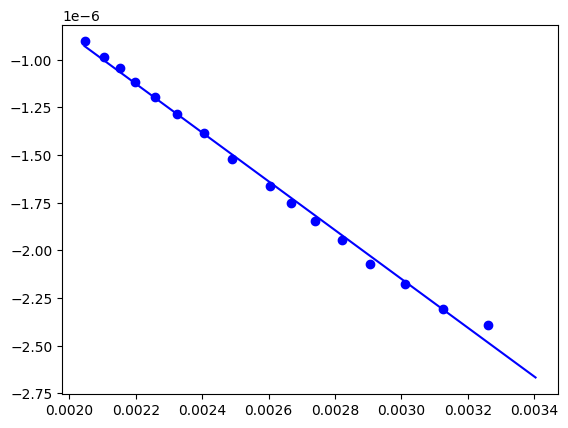

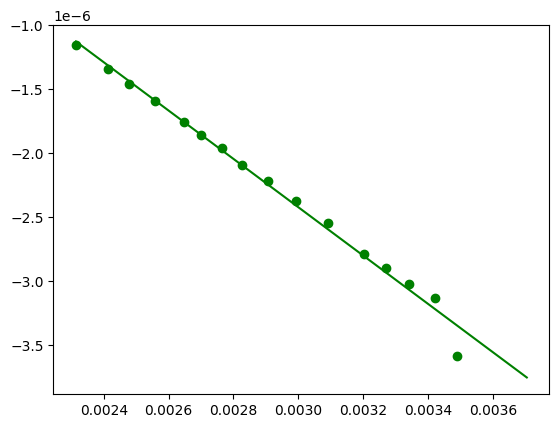

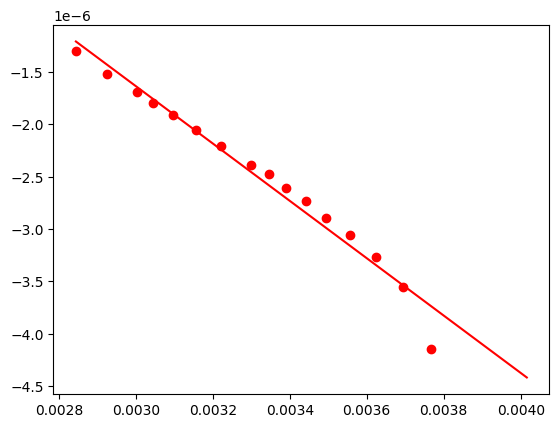

In [7]:


colors = {
    23 : "b",
    28 : "g",
    33 : "r"
}


def Auswertung(K0 , Ks, ts, T):
    fig, ax = plt.subplots()
    Xs = Ks
    Ys = (Ks-K0) / ts
    ax.scatter(Xs[1:], Ys[1:],c=colors[T])
    Fitwerte = linregress(Xs[1:], Ys[1:])
    ax.plot(Xs, Xs * Fitwerte.slope + Fitwerte.intercept, c = colors[T])
    k = Fitwerte.slope / (-1 * 0.5 * c_ges)
    print(f"k bei {T}°C: {k}")
    return k

k_A = Auswertung(K0_A, Ks_A, ts_A, 23)
k_B = Auswertung(K0_B, Ks_B, ts_B, 28)
k_C = Auswertung(K0_C, Ks_C, ts_C, 33)


A = 1170820570.7853873 EA = 57474.841653070616


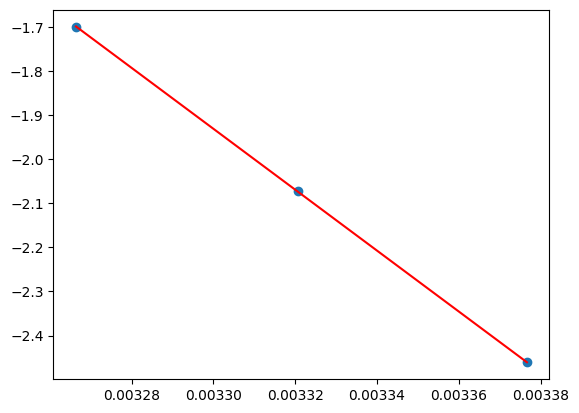

In [11]:
R = 8.31446

def Arrhenius(ks,Ts):
    fig,ax = plt.subplots()
    ax.scatter(1/Ts, np.log(ks))
    Fitwerte = linregress(1/Ts, np.log(ks))
    A = np.exp(Fitwerte.intercept)
    E_Akt = -1*R * Fitwerte.slope
    ax.plot(1/Ts, Fitwerte.intercept + Fitwerte.slope * (1/Ts), c = "red")
    return A, E_Akt

ks_arrPlot = np.array([k_A, k_B, k_C])
Ts_arrPlot = np.array([23, 28, 33]) + 273.15
y = Arrhenius(ks_arrPlot, Ts_arrPlot)
print(f"A = {np.format_float_scientific(y[0])} EA = {(y[1])}")

In [6]:
from tabulate import tabulate as t
from IPython.display import display, HTML 
display(HTML('<h1>Daten für 23°C</h1>'))
display(t([(ts_A[i],Ls_A[i],Ks_A[i]) for i in range(ts_A.size)],tablefmt="html", headers=["Zeit t / min", "Leitwert / S","Leitfähigkeit / S * m^-1"]))
display(HTML('<h1>Daten für 28°C</h1>'))
display(t([(ts_B[i],Ls_B[i],Ks_B[i]) for i in range(ts_B.size)],tablefmt="html", headers=["Zeit t / min", "Leitwert / S","Leitfähigkeit / S * m^-1"]))
display(HTML('<h1>Daten für 33°C</h1>'))
display(t([(ts_C[i],Ls_C[i],Ks_C[i]) for i in range(ts_C.size)],tablefmt="html", headers=["Zeit t / min", "Leitwert / S","Leitfähigkeit / S * m^-1"]))

Zeit t / min,Leitwert / S,Leitfähigkeit / S * m^-1
0,0.00712,0.00340386
60,0.00682,0.00326044
120,0.00654,0.00312658
180,0.0063,0.00301184
240,0.00608,0.00290667
300,0.0059,0.00282061
360,0.00573,0.00273934
420,0.00558,0.00266763
480,0.00545,0.00260548
600,0.00521,0.00249075


Zeit t / min,Leitwert / S,Leitfähigkeit / S * m^-1
0,0.00775,0.00370504
60,0.0073,0.00348991
90,0.00716,0.00342298
120,0.00699,0.00334171
150,0.00684,0.00327
180,0.0067,0.00320307
240,0.00647,0.00309311
300,0.00626,0.00299272
360,0.00608,0.00290667
420,0.00591,0.00282539


Zeit t / min,Leitwert / S,Leitfähigkeit / S * m^-1
0,0.0084,0.00401579
60,0.00788,0.00376719
90,0.00773,0.00369548
120,0.00758,0.00362377
150,0.00744,0.00355684
180,0.00731,0.00349469
210,0.0072,0.00344211
240,0.00709,0.00338952
270,0.007,0.00334649
300,0.0069,0.00329868
